1) load numpy arrays

2) pass it to the model for training

3) plot and evaluate model¶


In [2]:
import numpy

In [3]:
train_d = numpy.load('data/train_data.npy')

In [4]:
train_l =numpy.load('data/train_label.npy')

In [5]:
test_d = numpy.load('data/test_data.npy')

In [6]:
test_l = numpy.load('data/test_label.npy')

In [7]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['acc'], marker='.')
    plt.plot(history.history['val_acc'], marker='.')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()
    plt.savefig('model_accuracy.png')
    plt.close()

    plt.plot(history.history['loss'], marker='.')
    plt.plot(history.history['val_loss'], marker='.')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    plt.legend(['loss', 'val_loss'], loc='upper right')
    plt.show()
    plt.savefig('model_loss.png')
    plt.close()

In [8]:
def save_history(history):
    loss = history.history['loss']
    acc = history.history['acc']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_acc']
    nb_epoch = len(acc)

    with open('result.txt', 'w') as fp:
        fp.write('epoch\tloss\tacc\tval_loss\tval_acc\n')
        for i in range(nb_epoch):
            fp.write('{}\t{}\t{}\t{}\t{}\n'.format(
                i, loss[i], acc[i], val_loss[i], val_acc[i]))


/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(128, kernel_size=(3, 3, 3), input_shape=(3, 16, 11..., padding="same")`
  
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
  app.launch_new_instance()
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(3, 3, 3), padding="same")`
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
/home/sgg_goel/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv3D` ca

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 3, 16, 112, 128)   387200    
_________________________________________________________________
activation_1 (Activation)    (None, 3, 16, 112, 128)   0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 16, 112, 64)    221248    
_________________________________________________________________
activation_2 (Activation)    (None, 3, 16, 112, 64)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 6, 38, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 6, 38, 64)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 6, 38, 64)      110656    
__________

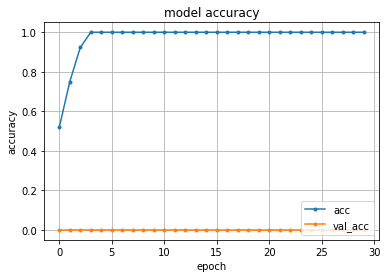

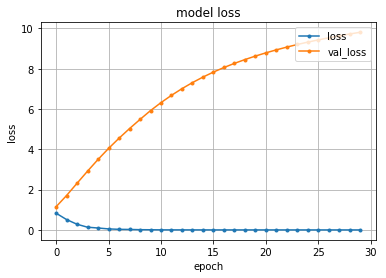

ImportError: `save_weights` requires h5py.

In [9]:
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
# Define model
model = Sequential()
model.add(Conv3D(128, kernel_size=(3, 3, 3), input_shape=(
train_d.shape[1:]), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))

model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()


history = model.fit(train_d, train_l, validation_data=(test_d, test_l), batch_size=130,epochs=30, verbose=1, shuffle=True)
plot_history(history)
save_history(history)




52/52 [==============================] - 16s 306ms/step
Test loss: 9.811587260319637
Test accuracy: 0.0
